# Exploratory Data Analysis
### Author: Ehsan Gharib-Nezhad


In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Dataset 1: Human dataset
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [2]:
# Load datasets
human = pd.read_table('../datasets/human.txt',)

In [3]:
human.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


### Check number of observations/DNA Sequences and the data type

In [7]:
print(f'The length of the human DNA squence is {human.shape[0]} and it consists of {human.shape[1]} columns.')

The length of the human DNA squence is 4380 and it consists of 2 columns.


In [27]:
human.dtypes

sequence           object
class               int64
sequence_length     int64
dtype: object

### Check if there is null or NAN data

In [8]:
human.isnull().sum()

sequence    0
class       0
dtype: int64

### Count the number of characters in each sequance

In [11]:
# create a new column "sequence_length" to save the number of sequence length or 
# number of nucleobases (i.e., A, T, G, C) in each class (or gene family)

human['sequence_length'] = human['sequence'].str.len()

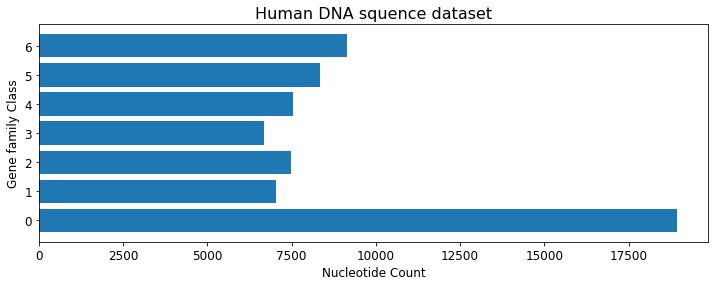

In [12]:
plt.figure(figsize = (12,4))
plt.title('Human DNA squence dataset', fontsize = 16)
plt.barh(human['class'], human['sequence_length'])
plt.xlabel('Nucleotide Count', fontsize = 12)
plt.ylabel('Gene family Class', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

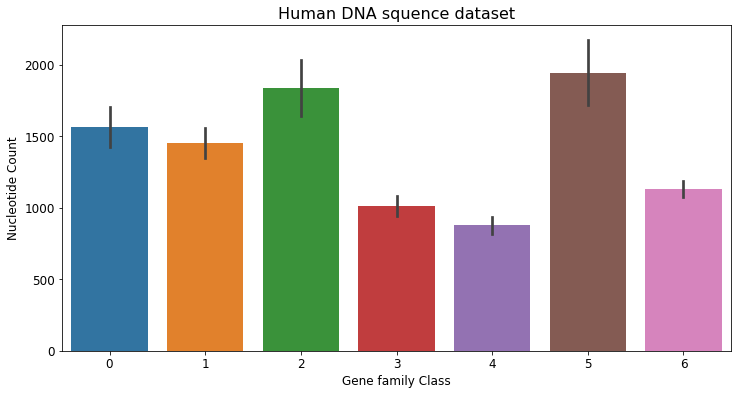

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Human DNA squence dataset', fontsize = 16)
sns.barplot(x='class', y='sequence_length', data= human)
plt.ylabel('Nucleotide Count', fontsize = 12)
plt.xlabel('Gene family Class', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

## Count the number of A, T, G, and C nucleotide in each sequence and each class

In [14]:
# in the original post
human['A_count'] = [seq.count('A') for seq in human['sequence']]
human['T_count'] = [seq.count('T') for seq in human['sequence']]
human['G_count'] = [seq.count('G') for seq in human['sequence']]
human['C_count'] = [seq.count('C') for seq in human['sequence']]

In [15]:
human

,sequence,class,sequence_length,A_count,T_count,G_count,C_count
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,80,45,13,69
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,206,174,71,230
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,476,483,393,334
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,339,363,294,210
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,417,406,326,288
...,...,...,...,...,...,...,...
4375,ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...,0,57,22,18,11,6
4376,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6,5883,1637,1181,1523,1542
4377,ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...,6,5817,1625,1174,1508,1510
4378,ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...,6,753,190,148,220,195


In [16]:
human.groupby(by=['class']).sum()

,sequence_length,A_count,T_count,G_count,C_count
class,,,,,
0,829609,196652,203581,205792,223536
1,777626,181489,164836,219718,211535
2,642305,177035,146343,158830,160058
3,679350,170697,152384,186412,169764
4,623455,150443,138576,172174,162154
5,466647,120161,108260,120063,118130
6,1515570,405682,308520,390115,411092


<Figure size 864x432 with 0 Axes>

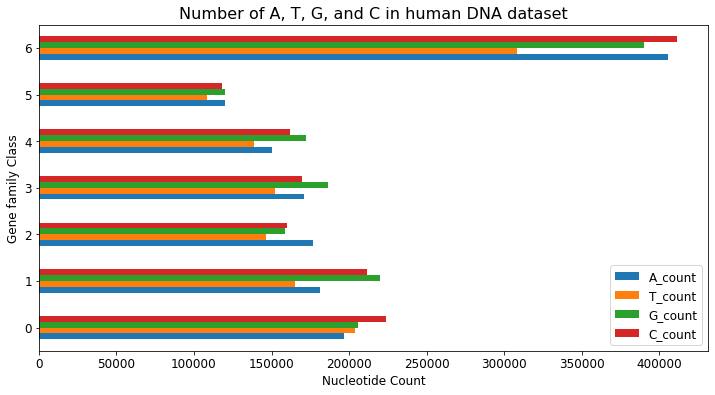

In [17]:
plt.figure(figsize=(12, 6))
human.groupby(by=['class']).sum().drop(columns=['sequence_length']).plot(kind='barh', figsize=(12, 6));
plt.title('Number of A, T, G, and C in human DNA dataset', fontsize = 16)
plt.xlabel('Nucleotide Count', fontsize = 12)
plt.ylabel('Gene family Class', fontsize = 12)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [45]:
human.to_csv('../outputs/processed_human_sequence.csv', header=human.columns, index_label=False)

---

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Dataset 2: Chimpanzee dataset
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [18]:
# Load datasets
chimpanzee = pd.read_table('../datasets/chimpanzee.txt')
chimpanzee

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6
...,...,...
1677,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1678,ATGCTGAGCGGAGCGGCTGGGGCTGCGCGGCGTGGCGGAGCAGCGC...,5
1679,ATGAAGCGACCCAAGGAGCCGAGCGGCTCCGACGGGGAGTCCGACG...,6
1680,ATGACTGGAACCCCAAAGACTCAAGAAGGAGCTAAAGATCTTGAAG...,3


### check number of observations/DNA Sequences

In [19]:
chimpanzee.shape

(1682, 2)

In [20]:
chimpanzee.dtypes

sequence    object
class        int64
dtype: object

### check/drop Null data

In [21]:
chimpanzee.isnull().sum()

sequence    0
class       0
dtype: int64

### count the number of characters in each Chimpanzee Seqeunce

In [22]:
chimpanzee['sequence_length'] = chimpanzee['sequence'].str.len()

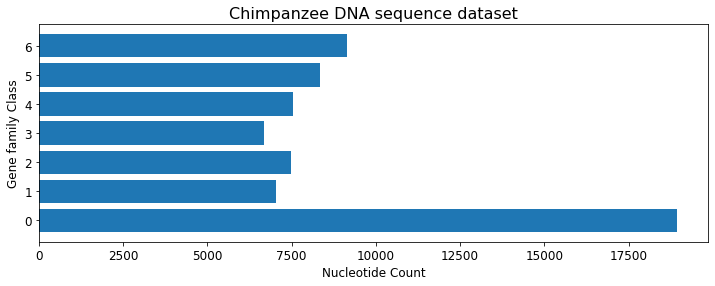

In [24]:
plt.figure(figsize = (12,4))
plt.title('Chimpanzee DNA sequence dataset', fontsize = 16)
plt.barh(chimpanzee['class'], chimpanzee['sequence_length'])
plt.xlabel('Nucleotide Count', fontsize = 12)
plt.ylabel('Gene family Class', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

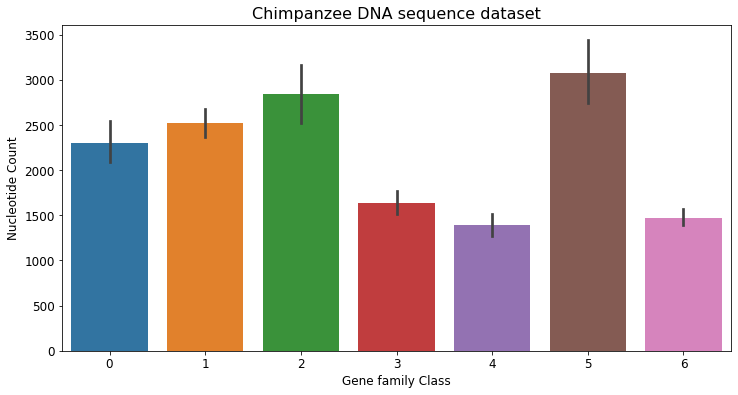

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Chimpanzee DNA sequence dataset', fontsize = 16)
sns.barplot(x='class', y='sequence_length', data= chimpanzee)
plt.ylabel('Nucleotide Count', fontsize = 12)
plt.xlabel('Gene family Class', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

### Count the number of A, T, G, and C nucleotide in each sequence and each class

In [26]:
# in the original post
chimpanzee['A_count'] = [seq.count('A') for seq in chimpanzee['sequence']]
chimpanzee['T_count'] = [seq.count('T') for seq in chimpanzee['sequence']]
chimpanzee['G_count'] = [seq.count('G') for seq in chimpanzee['sequence']]
chimpanzee['C_count'] = [seq.count('C') for seq in chimpanzee['sequence']]

In [27]:
chimpanzee.head()

,sequence,class,sequence_length,A_count,T_count,G_count,C_count
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4,207,79,45,14,69
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4,681,204,179,74,224
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4,1248,353,302,306,287
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4,1239,348,297,307,287
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6,1008,202,163,322,321


In [28]:
chimpanzee.groupby(by=['class']).sum()

,sequence_length,A_count,T_count,G_count,C_count
class,,,,,
0,538560,128303,131459,133078,145662
1,466314,115383,100043,127003,123885
2,408855,111425,92433,101700,103297
3,372825,96580,84977,100964,90199
4,363477,87034,81555,99792,95096
5,335088,86378,78079,85576,85055
6,768081,204337,156143,198005,209596


<Figure size 864x432 with 0 Axes>

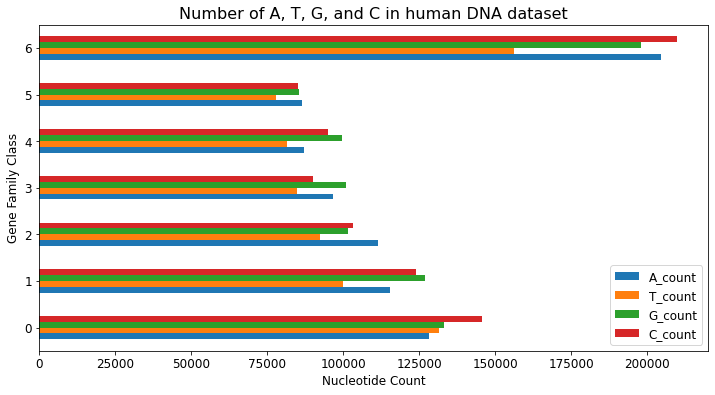

In [29]:
plt.figure(figsize=(12, 6))
chimpanzee.groupby(by=['class']).sum().drop(columns=['sequence_length']).plot(kind='barh', figsize=(12, 6));
plt.title('Number of A, T, G, and C in human DNA dataset', fontsize = 16)
plt.xlabel('Nucleotide Count', fontsize = 12)
plt.ylabel('Gene Family Class', fontsize = 12)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [46]:
chimpanzee.to_csv('../outputs/processed_chimpanzee_sequence.csv', header=chimpanzee.columns, index_label=False)

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Dataset 3: Dog dataset
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [30]:
# Load datasets
dog = pd.read_table('../datasets/dog.txt')
dog

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0
...,...,...
815,ATGGTCGGTCCGGAGAAGGAGCAGAGCTGGATCCCTAAGATCTTCA...,5
816,ATGGCGGCGACGGTGGCTGCGGCGGCCGCCGACGCGGGGCCGGGGG...,6
817,ATGAGCTCGGCCGACAAGGCCCGGGTGGGGCCCGCGGCCGACGGGC...,6
818,GCCCCGAGGATGGGCAGGGTCCCGCTGGCCTGGTGCTTGGCGCTGT...,1


### check number of observations/DNA Sequences

In [31]:
dog.shape

(820, 2)

In [32]:
dog.dtypes

sequence    object
class        int64
dtype: object

### count the number of characters in each Chimpanzee Seqeunce

In [33]:
dog['sequence_length'] = dog['sequence'].str.len()

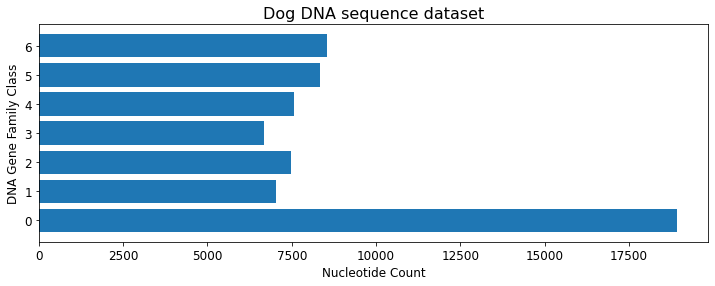

In [34]:
plt.figure(figsize = (12,4))
plt.title('Dog DNA sequence dataset', fontsize = 16)
plt.barh(dog['class'], dog['sequence_length'])
plt.xlabel('Nucleotide Count', fontsize = 12)
plt.ylabel('DNA Gene Family Class', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

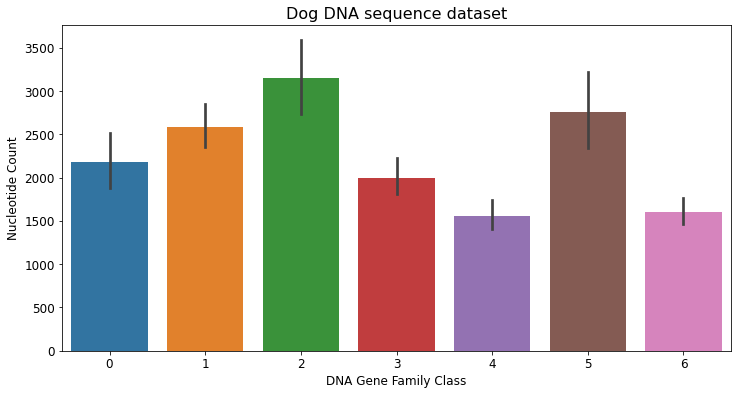

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Dog DNA sequence dataset', fontsize = 16)
sns.barplot(x='class', y='sequence_length', data= dog)
plt.ylabel('Nucleotide Count', fontsize = 12)
plt.xlabel('DNA Gene Family Class', fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

### Count the number of A, T, G, and C nucleotide in each sequence and each class

In [36]:
# in the original post
dog['A_count'] = [seq.count('A') for seq in dog['sequence']]
dog['T_count'] = [seq.count('T') for seq in dog['sequence']]
dog['G_count'] = [seq.count('G') for seq in dog['sequence']]
dog['C_count'] = [seq.count('C') for seq in dog['sequence']]

In [37]:
dog.head()

,sequence,class,sequence_length,A_count,T_count,G_count,C_count
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4,204,71,61,17,55
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4,681,200,210,82,189
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6,1044,172,126,359,387
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6,1044,204,132,340,368
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0,966,172,255,242,297


In [38]:
dog.groupby(by=['class']).sum()

,sequence_length,A_count,T_count,G_count,C_count
class,,,,,
0,284937,65247,67312,73058,79252
1,194208,48575,41674,52471,51463
2,201912,53537,43631,51402,53340
3,189933,47834,42818,52037,47244
4,210387,50807,46757,57345,55436
5,165420,41475,39137,42451,42357
6,418104,107266,81776,111157,117810


<Figure size 864x432 with 0 Axes>

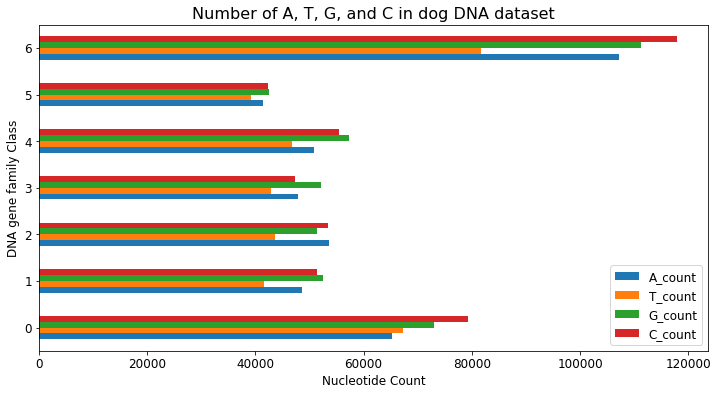

In [39]:
plt.figure(figsize=(12, 6))
dog.groupby(by=['class']).sum().drop(columns=['sequence_length']).plot(kind='barh', figsize=(12, 6));
plt.title('Number of A, T, G, and C in dog DNA dataset', fontsize = 16)
plt.xlabel('Nucleotide Count', fontsize = 12)
plt.ylabel('DNA gene family Class', fontsize = 12)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [42]:
dog.to_csv('../outputs/processed_dog_sequence.csv', header=dog.columns, index_label=False)

In [44]:
# pd.read_csv('../outputs/processed_dog_sequence.csv')